## Задача 1. 60 баллов
Работаем с датасетом https://disk.yandex.ru/d/P6u1Za-nnmtwPA
Скачайте его.

Оцениваем факторы, которые влияют на цену на аренду в Москве.
Описание столбцов:

**metro** - ближайшая станция метро

**price** - цена за аренды


**minutes** - расстояние до метро в минутах

**way** - пусть до метро (пешком или на транспорте)

**views** - просмотры квартиры

**provider** - кто сдает квартиру (собственникЮ риелторЮ застройщик)

**fee_percent** - процент, который получает риелтор

**storey**- этаж

**storeys**- число этажей в здании

**living_area** - жилая площаль

**kitchen_area** - площадь кухни

**total_area** - общая площадь


#### Часть 1. EDA. 10 баллов

In [1]:
import pandas as pd
df = pd.read_csv('rent.csv', index_col=0)

1. Отобразите первые 5 и последние 5 строк. (**1**)

In [2]:
df.head()

,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
1,VDNKh,50000,walk,389,realtor,50,16,10,16,18,8,41
2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
3,Sviblovo,38000,walk,414,realtor,50,3,15,5,37,37,37
4,Rimskaia,55999,walk,360,realtor,99,6,7,17,21,10,40


In [3]:
df.tail()

,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
1441,Solntcevo,25000,walk,189,realtor,0,6,5,23,20,10,36
1442,Ulitca Starokachalovskaia,25000,walk,173,realtor,0,5,5,17,20,10,38
1443,Zhulebino,25000,walk,102,realtor,0,5,5,12,20,10,35
1444,Preobrazhenskaia ploshchad,40000,walk,60,realtor,30,3,17,9,20,8,35
1445,Rasskazovka,30000,walk,2728,owner,0,12,10,17,22,8,33


2. Посчитайте описательные статистики числовых переменных с помощью describe() (**1**)

Исходя из описания наши числовые перменные:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 0 to 1445
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   metro         1446 non-null   object
 1   price         1446 non-null   int64 
 2   way           1446 non-null   object
 3   views         1446 non-null   int64 
 4   provider      1446 non-null   object
 5   fee_percent   1446 non-null   int64 
 6   storey        1446 non-null   int64 
 7   minutes       1446 non-null   int64 
 8   storeys       1446 non-null   int64 
 9   living_area   1446 non-null   int64 
 10  kitchen_area  1446 non-null   int64 
 11  total_area    1446 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 146.9+ KB


In [5]:
num_col = df.columns[df.dtypes != 'object']
num_col

Index(['price', 'views', 'fee_percent', 'storey', 'minutes', 'storeys',
       'living_area', 'kitchen_area', 'total_area'],
      dtype='object')

In [6]:
df[num_col].describe()

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,43770.738589,417.917012,37.949516,7.089903,8.753804,22.545643,20.585754,11.369986,37.265560
std,33232.151532,936.532913,26.893347,16.511552,4.710759,347.279854,5.608993,8.083777,6.143386
min,14000.000000,4.000000,0.000000,1.000000,0.000000,1.000000,6.000000,3.000000,1.000000
25%,29000.000000,38.000000,0.000000,4.000000,5.000000,9.000000,18.000000,7.000000,34.000000
50%,38000.000000,103.000000,50.000000,6.000000,7.000000,12.000000,20.000000,10.000000,37.000000
75%,45000.000000,414.000000,50.000000,9.000000,12.000000,16.000000,21.000000,10.000000,40.000000
max,500000.000000,5174.000000,100.000000,613.000000,47.000000,13217.000000,37.000000,37.000000,57.000000


3. Посчитайте статистики по категориальным переменным. Сколько уникальных значений у переменной metro? (**1**)

In [7]:
cat_col = df.columns[df.dtypes == 'object']
cat_col

Index(['metro', 'way', 'provider'], dtype='object')

In [8]:
df[cat_col].describe()

,metro,way,provider
count,1446,1446,1446
unique,119,2,7
top,Planernaia,walk,realtor
freq,126,1331,615


In [9]:
print('уникальных значений у перемнной метро:', df['metro'].nunique())

уникальных значений у перемнной метро: 119


4. Есть ли в датасете пропуски? (**1**)

In [10]:
df.isna().sum()

metro           0
price           0
way             0
views           0
provider        0
fee_percent     0
storey          0
minutes         0
storeys         0
living_area     0
kitchen_area    0
total_area      0
dtype: int64

Пропусков нет.

5. Есть ли в датасете полные дубликаты? (**1**)

In [11]:
df[df.duplicated(keep=False)].sort_values(by=['metro','price','way','views'])

,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
248,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
278,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
308,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
338,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...
1383,Zhulebino,25000,walk,102,realtor,0,5,5,12,20,10,35
1413,Zhulebino,25000,walk,102,realtor,0,5,5,12,20,10,35
1443,Zhulebino,25000,walk,102,realtor,0,5,5,12,20,10,35
104,No data,30260,walk,17,agency,0,3,0,11,37,37,37


In [12]:
print('Процент дубликатов: ',df.duplicated().sum()/len(df))

Процент дубликатов:  0.830567081604426


In [13]:
df = df.drop_duplicates().reset_index(drop=True)

In [14]:
df

,metro,price,way,views,provider,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
0,Planernaia,45000,walk,513,realtor,50,7,10,12,19,8,38
1,VDNKh,50000,walk,389,realtor,50,16,10,16,18,8,41
2,Alekseevskaia,50000,walk,483,realtor,50,5,3,12,19,5,33
3,Sviblovo,38000,walk,414,realtor,50,3,15,5,37,37,37
4,Rimskaia,55999,walk,360,realtor,99,6,7,17,21,10,40
...,...,...,...,...,...,...,...,...,...,...,...,...
240,Buninskaia Alleia,29000,transport,25,Застройщик,50,3,18,9,37,37,37
241,Liublino,43000,walk,23,agency,70,1,11,5,16,6,31
242,Botanicheskii sad,60000,walk,21,Застройщик,50,5,2,26,37,37,37
243,No data,30000,walk,9,agency,0,2,0,4,37,37,37


6. Сколько уникальных значений у переменной provider? Есть ли со значениями этой переменной какие-нибудь проблемы? Если да, то как их исправить? (**1**)

> Ответ текстом

In [15]:
df['provider'].value_counts()

provider
agency                           90
Застройщик                       68
owner                            38
realtor                          16
realtor                          15
agency                           10
agency                            8
Name: count, dtype: int64

In [16]:
print('Уникальных значений: ',df.provider.nunique())

Уникальных значений:  7


Отлично, нашли проблемы разный язык и по ходу символы у одинаковых знчений.

In [17]:
df['provider'] = df['provider'].apply(lambda x: x.strip() if x.strip()!='Застройщик' else 'builder')

In [18]:
df['provider'].value_counts()

provider
agency     108
builder     68
owner       38
realtor     31
Name: count, dtype: int64

In [19]:
print('Уникальных значений: ',df.provider.nunique())

Уникальных значений:  4


Изменили.

7. Постройте гистограммы распределения всех числовых переменных. Не забудьте подписать график и оси. (**1**)

In [20]:
import matplotlib.pyplot as plt

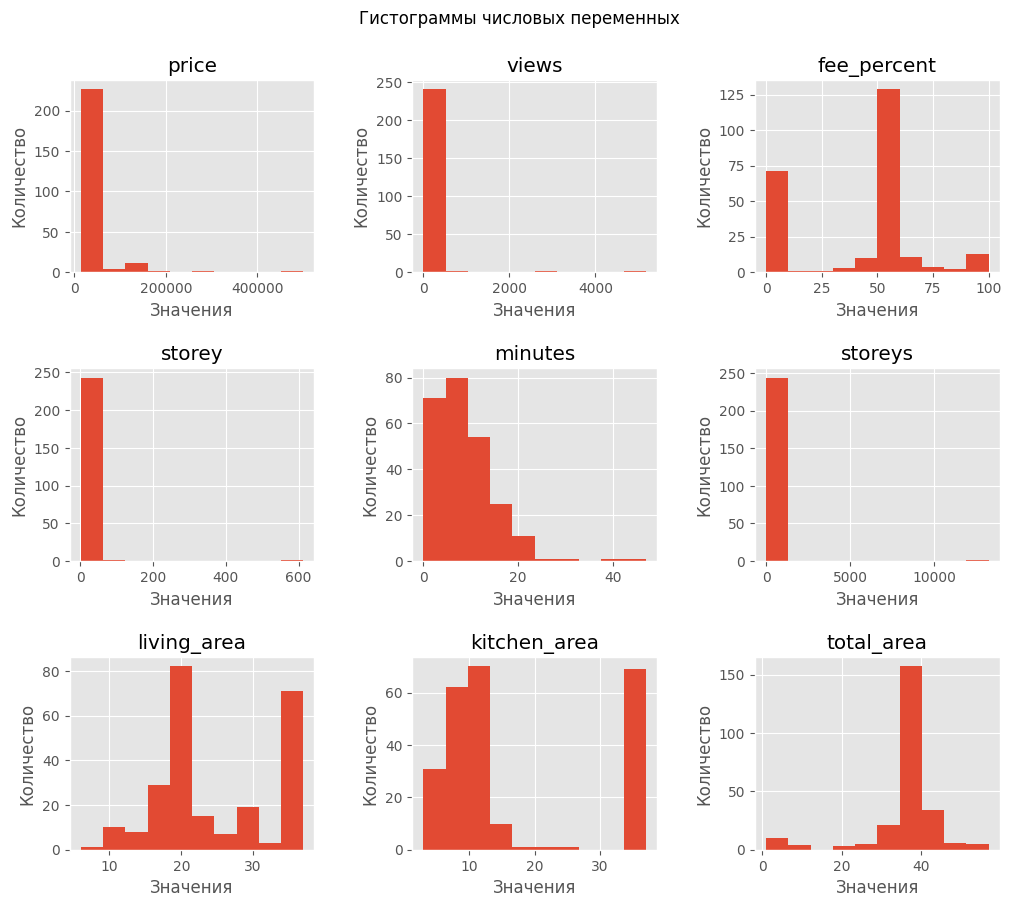

In [21]:
plt.style.use('ggplot')

fig, axs = plt.subplots(ncols=int(len(num_col)/3), nrows=int(len(num_col)/3), figsize=(12, 10))

fig.subplots_adjust(hspace=0.5, wspace=0.4) 

# задаем каунтер для перебора
counter=0
for row in range(3):
    for col in range(3):

        axs[row, col].hist(df[num_col[counter]])
        axs[row, col].set_title(num_col[counter])
        axs[row, col].set_xlabel('Значения')
        axs[row, col].set_ylabel('Количество')
        
        counter+=1

fig.suptitle('Гистограммы числовых переменных', y=0.95)
plt.show()

* storey и storeys имеют выбросы больше 10000 этажность?
* views также, что-то странное с объявлением 

8. Нарисуйте scatterplot всех пар переменных с помощью sns.pairplot. (**1**)

In [22]:
import seaborn as sns

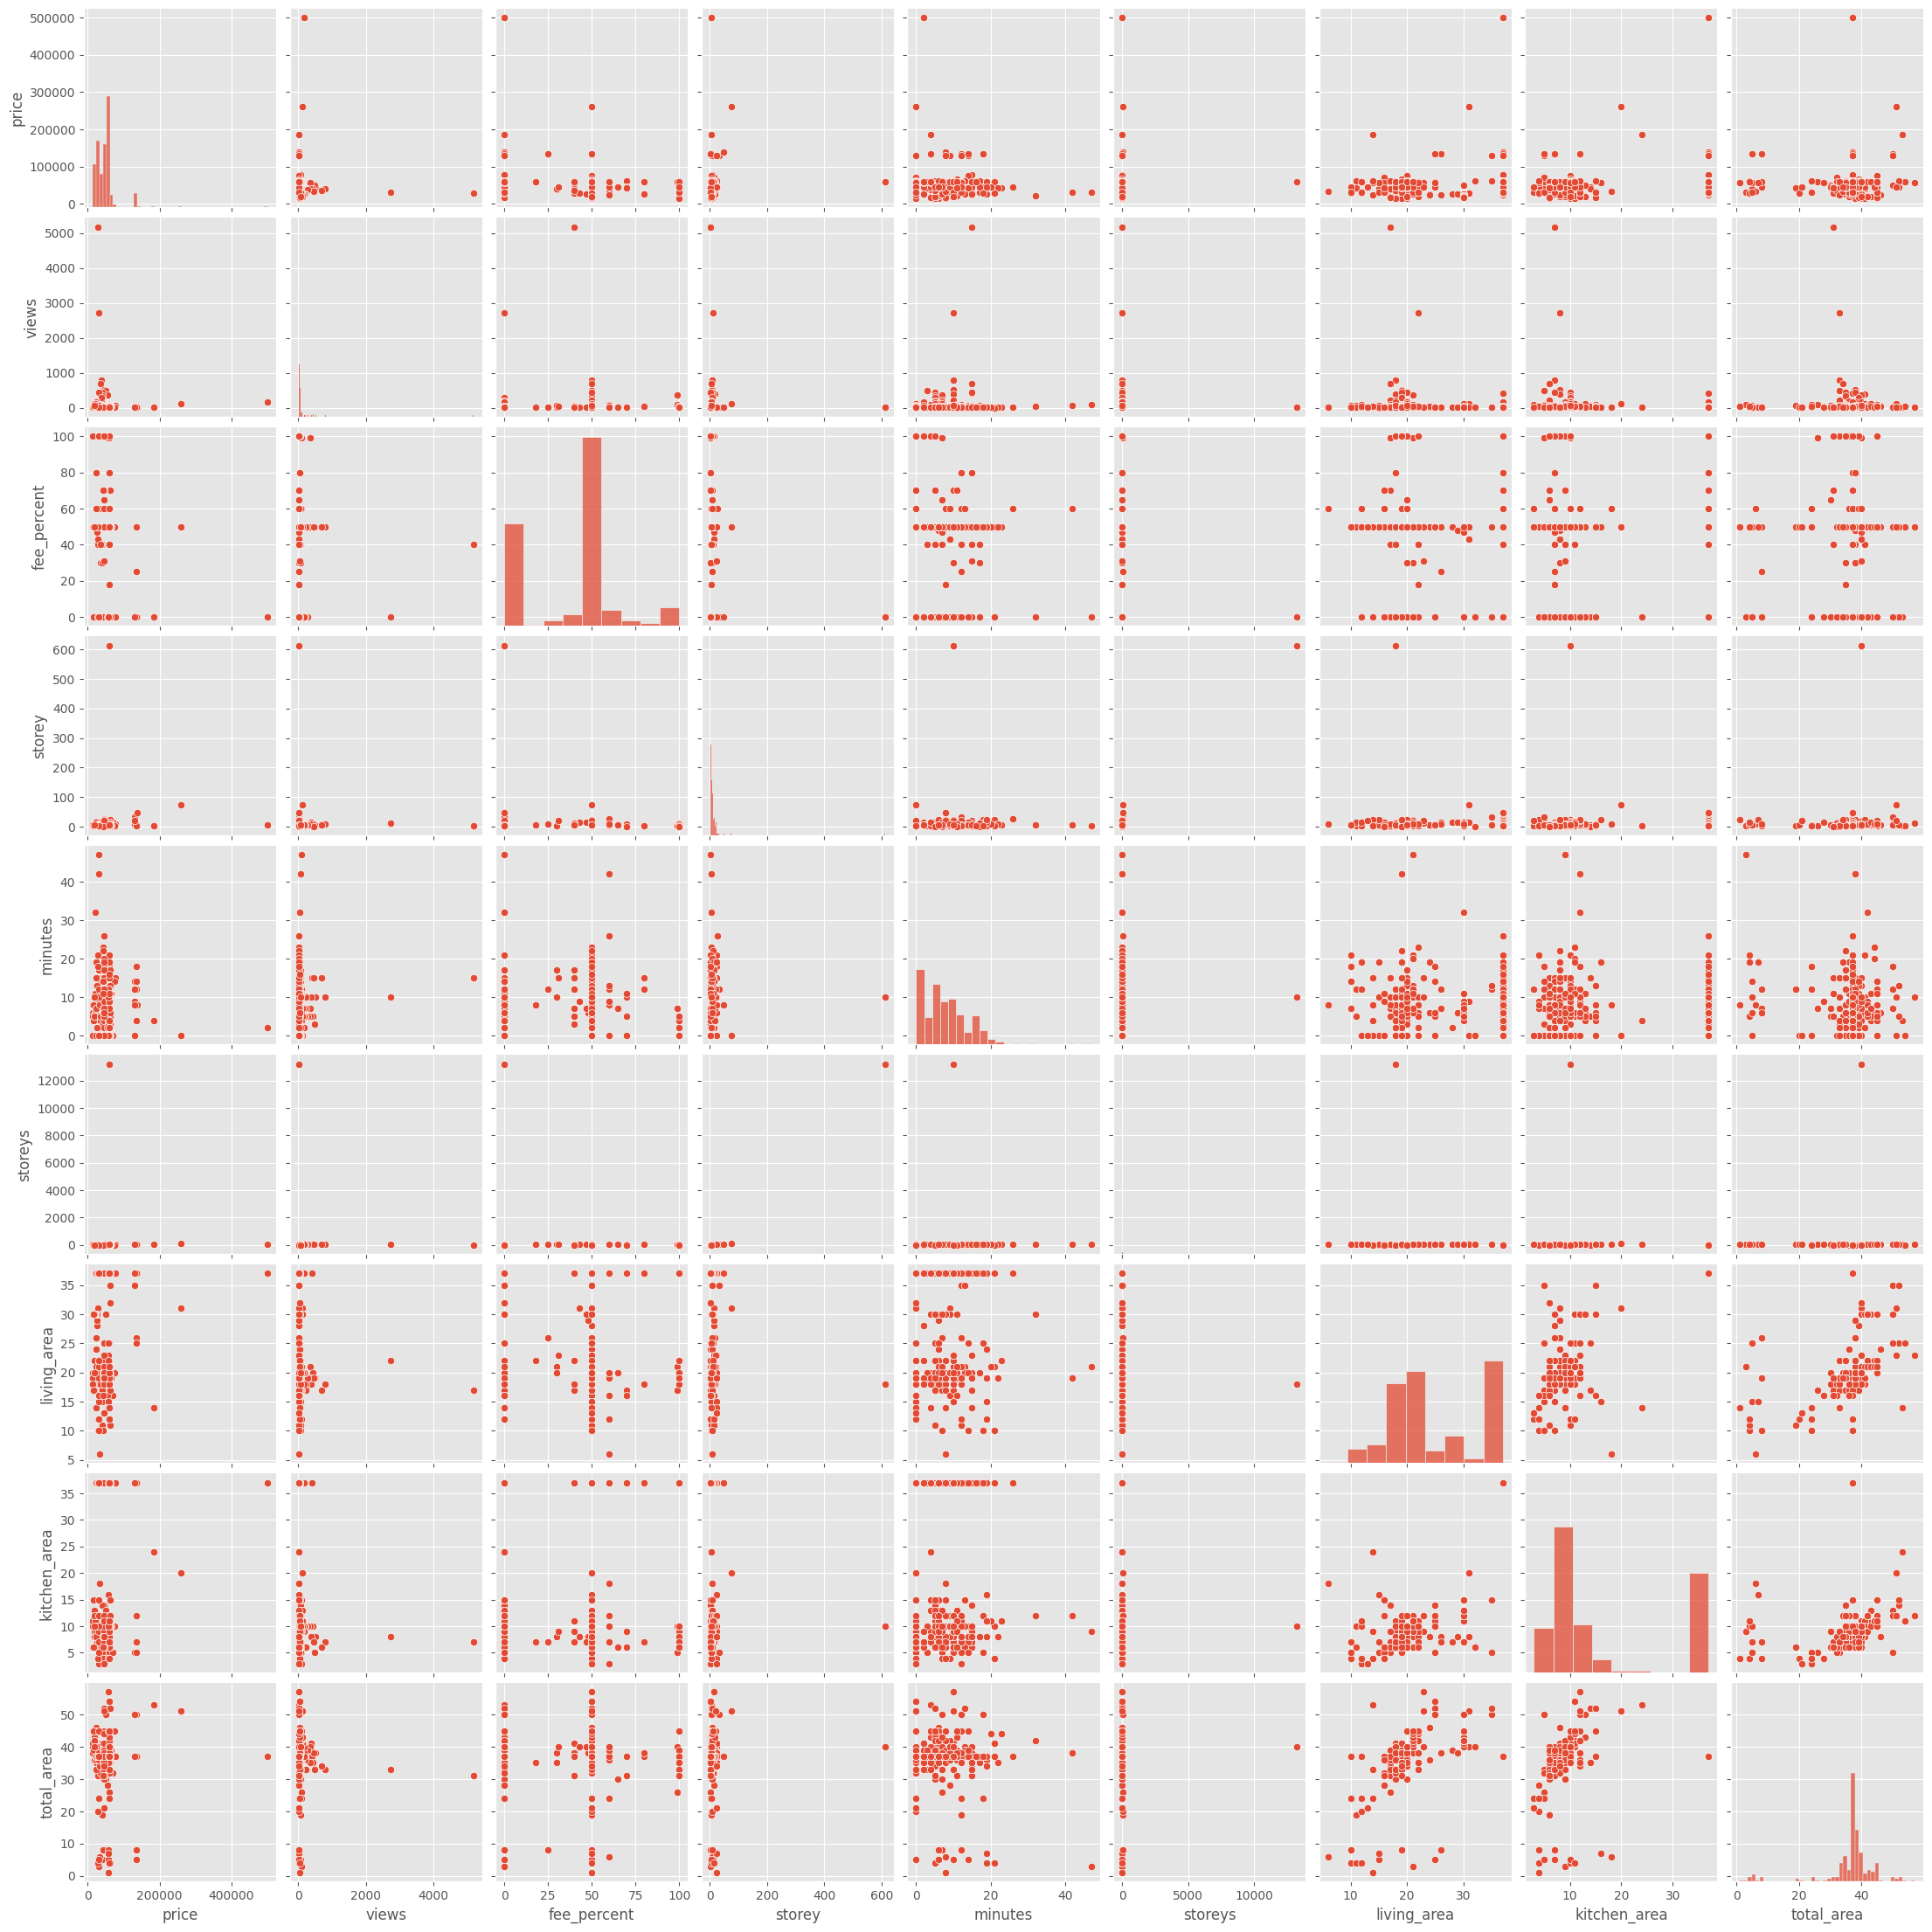

In [23]:
sns.pairplot(df[num_col])
plt.show()

9. Постройте таблицу корреляций и тепловую карту числовых переменных. Между какими переменными наблюдается линейная связь? (**2**)

я возьму трешхолд +-0.85 для отобраэжения лин связи.

In [24]:
corr_matrix = df[num_col].corr()
corr_matrix

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
price,1.000000,-0.046706,-0.159946,0.070441,-0.074924,0.018541,0.211085,0.243515,0.006046
views,-0.046706,1.000000,-0.026805,-0.019725,0.078572,-0.013235,-0.103415,-0.106179,-0.037596
fee_percent,-0.159946,-0.026805,1.000000,-0.087791,-0.043229,-0.089446,-0.287182,-0.217804,-0.049272
storey,0.070441,-0.019725,-0.087791,1.000000,0.027628,0.982579,-0.048015,-0.040404,0.039210
minutes,-0.074924,0.078572,-0.043229,0.027628,1.000000,0.018024,-0.016318,-0.006020,-0.142629
storeys,0.018541,-0.013235,-0.089446,0.982579,0.018024,1.000000,-0.051725,-0.034357,0.027002
living_area,0.211085,-0.103415,-0.287182,-0.048015,-0.016318,-0.051725,1.000000,0.885334,0.314532
kitchen_area,0.243515,-0.106179,-0.217804,-0.040404,-0.006020,-0.034357,0.885334,1.000000,0.142474
total_area,0.006046,-0.037596,-0.049272,0.039210,-0.142629,0.027002,0.314532,0.142474,1.000000


In [25]:
trash_hold= 0.85

In [26]:
corr_matrix[(corr_matrix >= trash_hold) | (corr_matrix <= -trash_hold)]

,price,views,fee_percent,storey,minutes,storeys,living_area,kitchen_area,total_area
price,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fee_percent,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
storey,NaN,NaN,NaN,1.000000,NaN,0.982579,NaN,NaN,NaN
minutes,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
storeys,NaN,NaN,NaN,0.982579,NaN,1.000000,NaN,NaN,NaN
living_area,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.885334,NaN
kitchen_area,NaN,NaN,NaN,NaN,NaN,NaN,0.885334,1.000000,NaN
total_area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


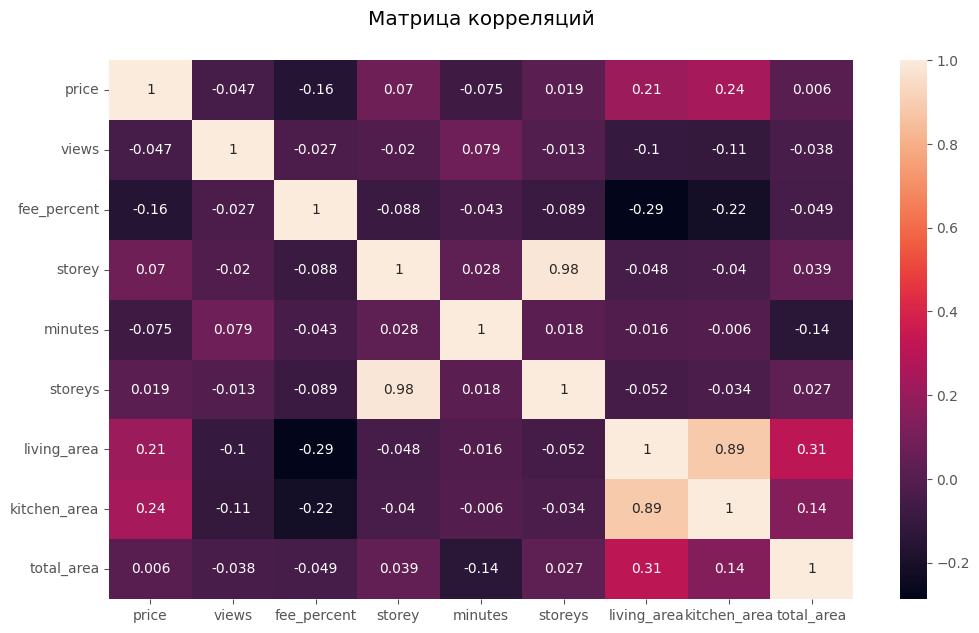

In [27]:
plt.figure(figsize=(12,7))
plt.title('Матрица корреляций', y=1.05)
sns.heatmap(corr_matrix, annot=True)
plt.show()

Как видно из таблицы и матрица выше, наибольшая лин зависимость:
* у столбцов storey и storeys - этажи (0.98)
* у kitchen_area и living_area - чем больше площадь одного параметра, тем больше другая (0.89)

#### Часть 2. Построение модели. 50 баллов

1. Раздйлите датасет на обучающую и тестовую выборку. Постройте линейную регрессию для переменной price, используя только числовые переменные. Перед этим стандартизируйте все независимые переменные с помощью StandardScaler. (**5**)

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
from sklearn.metrics import root_mean_squared_error as RMSE
from sklearn.pipeline import Pipeline

In [30]:
def spliter(df):
    """Возвращает X_train, X_test, y_train, y_test"""
    
    X = df.drop('price', axis=1)
    y = df['price']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)

    return X_train, X_test, y_train, y_test

In [31]:
X_train, X_test, y_train, y_test = spliter(df[num_col])

In [32]:
# захерачим пайплайн, так как я ленивый
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('linreg', LinearRegression())])

In [33]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('linreg', LinearRegression())])

2. Сделайте прогноз, посчитайте MSE и RMSE модели на тестовой выборке (**5**)

In [34]:
def output_metrics(X_train=X_train, 
                   X_test=X_test, 
                   y_train=y_train, 
                   y_test=y_test,
                  pipe=pipe) -> None:
    """Выводит mse и rmse на трейне и тесте"""
    
    print('mse на трейне', round(MSE(y_train, pipe.predict(X_train)),2))
    print('rmse на трейне', round(RMSE(y_train, pipe.predict(X_train)),2))

    print('mse на тесте', round(MSE(y_test, pipe.predict(X_test)),2))
    print('rmse на тесте', round(RMSE(y_test, pipe.predict(X_test)),2))

In [35]:
output_metrics()

mse на трейне 491418269.11
rmse на трейне 22167.96
mse на тесте 4237494553.53
rmse на тесте 65096.04


3. Закодируйте переменные way	и	provider с помощью OneHotEncoding и добавьте их в модель. Обучите модель еще раз, посчитайте MSE и RMSE (**5**)

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [37]:
# трансформ для кат признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), cat_col.drop('metro')) 
    ]
)

# пайплайн
pipe2 = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('scaler', StandardScaler()), 
    ('linreg', LinearRegression())  
])

In [38]:
X_train, X_test, y_train, y_test = spliter(df.drop('metro', axis=1))

In [39]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  Index(['way', 'provider'], dtype='object'))])),
                ('scaler', StandardScaler()), ('linreg', LinearRegression())])

In [40]:
output_metrics(X_train, X_test, y_train, y_test, pipe2)

mse на трейне 696795415.34
rmse на трейне 26396.88
mse на тесте 4307586033.52
rmse на тесте 65632.2


без OHE:

- mse на трейне 491418269.11
- rmse на трейне 22167.96
- mse на тесте 4237494553.53
- rmse на тесте 65096.04

А если отдельно кодирование!

In [43]:
ohe = OneHotEncoder(drop='first', sparse_output=False)

X_train, X_test, y_train, y_test = spliter(df)

In [44]:

# ресетним индексы
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

#обучим
ohe.fit(df[['provider','way']])

#объединим
X_train = pd.concat([
           pd.DataFrame(ohe.transform(X_train[['provider','way']]), columns= ohe.get_feature_names_out()),
    X_train.drop(['provider','way','metro'], axis=1),
          ], axis=1)

X_test = pd.concat([
           pd.DataFrame(ohe.transform(X_test[['provider','way']]), columns= ohe.get_feature_names_out()),
    X_test.drop(['provider','way','metro'], axis=1),
          ], axis=1)

In [45]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('linreg', LinearRegression())])

In [46]:
output_metrics(X_train, X_test, y_train, y_test, pipe)

mse на трейне 446568115.87
rmse на трейне 21132.16
mse на тесте 4251076883.39
rmse на тесте 65200.28


Ohe в pipeline:

- mse на трейне 696795415.34
- rmse на трейне 26396.88
- mse на тесте 4307586033.52
- rmse на тесте 65632.2


без OHE:

- mse на трейне 491418269.11
- rmse на трейне 22167.96
- mse на тесте 4237494553.53
- rmse на тесте 65096.04

Я не понимаю почему так. И чатгпт докопал по этому поводу и вообще, вроже должно быть одинаково с ohe в pipeline и с ohe, который не в пайплайн, но значения другие.

4. Удалите из обучающей выборке выбросы по цене (тестовую выборку не трогайте!) Выбросами считайте цены, которые дороже, чем $Q3+1.5 * IQR$, где $IQR$ - межквартильный размах, $Q3$ - 75 перцентиль. Обучите модель еще раз, посчитайте MSE и RMSE (**5**)

Как я понял это повсему датасету  трешхолд искать

In [47]:
IQR = df['price'].quantile(0.75) - df['price'].quantile(0.25)
thrashhold = df['price'].quantile(0.75) + 1.5*IQR

In [48]:
y_train = y_train[y_train < thrashhold]

In [49]:
X_train = X_train.iloc[y_train.index]

In [50]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('linreg', LinearRegression())])

In [51]:
output_metrics(X_train, X_test, y_train, y_test, pipe)

mse на трейне 157663568.63
rmse на трейне 12556.42
mse на тесте 4308874577.47
rmse на тесте 65642.02


5. Попробуйте написать свою реализацию функций MSE, RMSE, R2. Функции должны принимать на вход numpy-массив истинных значений и предсказаний и возвращать результат. Примените функции к предсказаниям последней модели. Сравните результат с библиотечной реализацией. (**9**)

Напоминаем, что

${MSE}=\frac{1}{n} \sum_{i=1}^n \left(y_i-\hat{y_i}\right)^2$, где $y_i$ - истинное значение на i-ом наблюдении, $\hat{y_i}$  - предсказание модели на i-ом наблюдении.

Также рекомендуем ознакомиться с документацией: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

R2 (коэффициент детерминации) - доля дисперсии, объясненная моделью. Поподробнее о реалиации можно почитать здесь: https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

так как мы называли ранее MSE , то название функции немного изменим.

In [52]:
def MSE_(y_true, y_pred) -> float:
    """return mse"""
    mse = (sum((y_true - y_pred)**2))/len(y_true)
    return mse

In [53]:
def RMSE_(y_true, y_pred) -> float:
    """return rmse"""
    rmse = MSE_(y_true, y_pred)**0.5

    return rmse

In [54]:
def r2(y_true, y_pred) -> float:
    """return r2"""

    ssres = (sum((y_true - y_pred)**2))
    sstot = sum((y_true - y_true.mean())**2)

    r2 = 1 - ssres/sstot
    
    return r2

In [55]:
def metrics_dif(f1,f2,X_train,y_train) -> None:
    """Выводит метрики наши и склерн"""
    print('func our:',f1(y_train, pipe.predict(X_train)))
    print('func sklearn:',f2(y_train, pipe.predict(X_train)))

In [56]:
metrics_dif(MSE_,MSE,X_train,y_train)

func our: 157663568.63401923
func sklearn: 157663568.6340193


In [57]:
from sklearn.metrics import r2_score

In [58]:
metrics_dif(r2,r2_score,X_train,y_train)

func our: 0.31585863789754354
func sklearn: 0.31585863789754365


In [59]:
metrics_dif(RMSE_,RMSE,X_train,y_train)

func our: 12556.415437298147
func sklearn: 12556.41543729815


можно считать равными!

6. Напишите класс CleanData. Этот класс будет отвечать за удаление выбросов, заполнение пропусков и кодирование переменных методами OneHotEncoding и MeanTargetEncoding. (**15**). В классе обязательно должны присутствовать методы fit и transform. transform должен возвращать трансформированный датасет.
Пользователь при создании экземпляра класса может указывать:
- список столбцов для кодирования OneHotEncoding
- список столбцов для кодирования MeanTargetEncoding
- стратегию заполнения пропусков (заполнение средним / медианным значением и т.п.; можете принимать на вход словарь, чтобы реализовать разные стратегии для разных столбцов)

 Все остальные особенности реализации остаются на Ваше усмотрение.

In [60]:
from sklearn.base import BaseEstimator

In [61]:
def blow_out(X,y,cols):
    """cols - сипсок столбцов
    для выбросов эта функ"""
    for col in cols:
        IQR = X[col].quantile(0.75) - X[col].quantile(0.25)
        max_thrashhold = X[col].quantile(0.75) + 1.5*IQR
        min_thrashhold = X[col].quantile(0.25) - 1.5*IQR
        X = X[(X[col] >= min_thrashhold)&(X[col] <= max_thrashhold)]

    y = y.loc[X.index]
    return X,y

In [62]:
class CleanData(BaseEstimator):

    def __init__(self, 
                 list_ohe=None, 
                 list_mte=None, 
                 voca_na=None) -> None:
        """
        list_ohe - список столбцов для кодирования OneHotEncoding
        list_mte - список столбцов для кодирования MeanTargetEncoding
        voca_na - стратегию заполнения пропусков(возможен словарь для разных столбцов)
        """

        self.list_ohe = list_ohe
        self.list_mte = list_mte
        self.voca_na = voca_na

    def fit(self, X, y):
        """
        X  и y получем
        здесь будем реализовывать:
        0. проверка множеств
        1. определить какие стобцы к чему будут использоваться
        """

        # создаем словарь для mte
        self.mean_enc = {}

        # закидываем в self y, для mte в fite
        self.y=y

        # проверяем вхождения
        try :
            if len(set(self.list_ohe) & (set(self.list_mte))) != 0:
                # в данном случае оставляем зн-ия ohe
                # убираем из mte зн-ия ohe
                self.list_mte = list(set(self.list_mte) - set(self.list_ohe))
        except:
            ...

        try :
            # делаем словарь для mte
            for col in self.list_mte:
                 X.loc[:, col] = X[col].str.strip()
                 self.mean_enc[col] = pd.concat([X, y], axis=1).groupby(col)[y.name].mean()
        except:
            ...

        try :
        # делаем для ohe уники мы же не знаем в дальнейшем
        # какие ьудут зн-ия у теста 
            self.ohe_train = pd.get_dummies(X[self.list_ohe],columns=self.list_ohe, prefix='ohe',drop_first=True).astype('int')
        except:
            ...
        return self


    def fil_na(self, X, col, stat):
        """заполняет пропуски, возвращает DF"""
        if stat == 'median':
            X[col]=X[col].fillna(X[col].median())
            
        elif stat == 'mean':
            X[col]=X[col].fillna(X[col].mean())

        elif stat == 'mode':
            X[col]=X[col].fillna(X[col].mode()[0])

        # для замены на значение
        elif isinstance(stat, (int,float,str)):
            X[col]=X[col].fillna(stat)

        return X

    
    def transform(self, X):
        """Возвращает трансформированный DF"""

        X =X.copy()
        # для пропусков
        if isinstance(self.voca_na,dict):
            for col,stat in self.voca_na.items():
                X = self.fil_na(X,col,stat)
        else:
            # достаем столбцы где есть пропуски и проходимся по ним
            for col in X.columns[X.isna().sum() > 0]:
                X = self.fil_na(X,col,self.voca_na)
            
        # для ohe
        
        self.ohe_test =  pd.get_dummies(X[self.list_ohe],columns=self.list_ohe, prefix='ohe',drop_first=True).astype('int')
        
        # проверяем и если что 
        # добавляем столбцы в нью датасет
        for col in self.ohe_train.columns:
            if col not in self.ohe_test.columns:
                self.ohe_test[col] = 0

        # проверяем и если что меняем
        # не больше ли значений в тесте, чем в трейне
        self.ohe_test = self.ohe_test[self.ohe_train.columns]

        # объединяем дф c ohe
        df_with_cat = pd.concat([X.drop(self.list_ohe, axis=1), self.ohe_test], axis=1)
        
        # для mte
        for col in self.list_mte:
            df_with_cat[col] = df_with_cat[col].str.strip()
            df_with_cat[f'{col}_m_enc'] = df_with_cat[col].map(self.mean_enc[col]).fillna(self.y.median())
            df_with_cat.drop([col], axis=1, inplace=True)

        return df_with_cat

In [63]:
pd.set_option('display.max_columns', None)

7. Создайте и обучите пайплайн из CleanData, StandardScaler, LinearRegression. Посчитайте метрики. **(6)**

In [64]:
from sklearn.pipeline import Pipeline

In [65]:
# создаем и удаляем выбросы
X_train, X_test, y_train, y_test = spliter(df)
X_train,y_train = blow_out(X_train, y_train, ['views'])

In [66]:
# Создаем пайплайн с предобработкой и линейной регрессией
pipe3 = Pipeline(steps=[
    ('cd', CleanData(list_ohe = ['provider','metro'], list_mte=['way'])),  
    ('scaler', StandardScaler()), 
    ('linreg', LinearRegression())  
])

In [67]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('cd',
                 CleanData(list_mte=['way'], list_ohe=['provider', 'metro'])),
                ('scaler', StandardScaler()), ('linreg', LinearRegression())])

In [68]:
output_metrics(X_train, X_test, y_train, y_test, pipe3)

mse на трейне 127234917.26
rmse на трейне 11279.85
mse на тесте 4033130824.31
rmse на тесте 63506.94


вроде сработало.

## Задача 2. (15 баллов)

### 2.1 (10)
Напишите код, который будет асинхронно загружать данные из нескольких веб-страниц. Используйте библиотеку aiohttp для выполнения HTTP-запросов. Программа должна выводить количество символов, загруженных из каждой страницы.

In [69]:
import asyncio
import aiohttp

async def fetch(url):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            status = response.status
            text = await response.text()
            return text

async def main(urls):

    tasks = [fetch(url) for url in urls]
    results = await asyncio.gather(*tasks)
     

    for url, content in zip(urls, results):
        print(f"{url}: {len(content)} символов")
urls = [
        "https://www.python.org",
        "https://www.wikipedia.org"
    ]

await main(urls)

https://www.python.org: 51029 символов
https://www.wikipedia.org: 108300 символов


### 2.2 (**5**)

Какие ошибки могут возникнуть в процессе исполнения кода выше? Как их можно обработать? Добавьте обработку ошибок в Ваш код.

1. статус страницы
2. None у content
3. другие ошибки

In [88]:
import asyncio
import aiohttp

async def fetch(url):
    async with aiohttp.ClientSession() as session:
        try:
            async with session.get(url) as response:
                status = response.status
    
                # для статуса
                if status == 200:
                    text = await response.text()
                else:
                    # заменим на '', чтобы было 0 символов
                    text = ''
                
                return text
        except:
            return None
            

async def main(urls):
    
    tasks = [fetch(url) for url in urls]
    
    results = await asyncio.gather(*tasks)
     
    for url, content in zip(urls, results):
        if content == None:
            content = ''
        print(f"{url}: {len(content)} символов")
        
urls = [
        "https://www.python.org",
        "https://www.wikipedia.org", 'sadasd.sds'
    ]

await main(urls)

https://www.python.org: 51029 символов
https://www.wikipedia.org: 108300 символов
sadasd.sds: 0 символов


## Задава 3 (25 баллов)


Напишите класс **Task**. У него должны быть следующие атрибуты:
* `number` - номер задачи
* `name` - название задачи


Напишите метод `init` (**2 балла**)

Переопределите для класса метод `str`, который вернет строку вида `f"{number}.{name}"`. (**3 балла**)

Теперь напишите класс **ProgrammingTask**, который является наследником класса Task.

Он должен дополнительно иметь методы:
* `language` - язык программирования (строка) - **1 балла**
* `list_of_students` - список студентов (список list, элементы которого - строки), которые решили задачу. По умолчанию список пустой. **(1 балл)**


Этот класс должен поддерживать следующие методы:
* `str `- вернет строку вида `f"{number}.{name} ({language})"`. **2 балла**
* `get_student_list`(без дополнительных аргументов) - возвращает значение `list_of_students`. **2 балла**
* `add_student` - принимает строку с фамилией студента и обновляет аргумент `list_of_students`. **2 балла**
* `task_from_str` - метод, который принимает на вход строку в формате `f"{number}.{name}.{language}"`
и возращает объект `Task` с соответствующими значениями number и name и значением `list_of_students` - пустой список. **2 балла**
* добавьте возможность сравнивать задачи между собой с помощью знака `==`. Сравнение должно возвращать True, если у задач совпадают номера и названия. **2 балла**


Создайте список задач tasklist (это объект list, каждый элемент которого - объект Task или ProgrammingTask).
Добавьте в него пять любых задач. **2 балла**

Отсортируйте задачи по номеру, при совпадении номеров - по названию.  **2 балла**

Добавьте аннотацию типов с помощью typing.  **2 балла**

Напишите docstrings ко всем методам.  **2 балла**

более веротяно ProgrammingTask должен иметь не методы, а атрибуту language /students.

In [89]:
from typing import List, Union
from dataclasses import dataclass

In [91]:
class Task:
    """
    Инициализирует номер и название задачи
    """
    def __init__(self, number: Union[int,str], name: str) -> None:
        """
        Инициализация класса
        number - номер задачи
        name - название задачи
        """
        self.number: Union[int,str] = number
        self.name: str = name

    def __str__(self) -> str:
        """
        вернет строку вида f"{number}.{name}"
        """
        return f"{self.number}.{self.name}" 

class ProgrammingTask(Task):
    """
    Инициализирует номер, название, язык и списко студентов
    Также добавляем значения в список, если нужно
    """
    def __init__(self, 
                 number: Union[int,str], 
                 name: str, 
                 language: str, 
                 list_of_students: List[str] = None) -> None:

        """
        Инициализация класса
        number - номер задачи
        name - название задачи
        language - язык программирования
        list_of_students - список студентов,реш. задачу
        """

        super().__init__(number, name)
        self.language: str = language
        
        # тк лист изменяемый тип, приходится так делать
        if list_of_students == None:
            self.list_of_students: List[str] = []
        else:
            self.list_of_students: List[str] = list_of_students

    def get_student_list(self) -> List[str]:
        """
        возвращает значение list_of_students
        """
        return self.list_of_students

    def add_student(self, surname: str) -> None:
        """
        принимает строку с фамилией студента и обновляет аргумент list_of_students
        """
        self.list_of_students.append(surname)

    @classmethod
    def task_from_str(self, stroka: str) -> object:
        """
        метод, который принимает на вход строку в формате 
        f"{number}.{name}.{language}" и возращает объект Task 
        с соответствующими значениями number и name 
        и значением list_of_students - пустой список
        """
        number, name, language = stroka.split('.')
        return cls(number,name,language)

    def __eq__(self, other: object) -> bool:
        """
        Сравнение должно возвращать True, если у задач совпадают номера и названия
        """
        if isinstance(other, Task):
            return self.number == other.number and self.name == other.name
        return False
    
    def __str__(self) -> str:
        """
        вернет строку вида f"{number}.{name} ({language})"
        """
        return f"{self.number}.{self.name} ({self.language})"

Создайте список задач tasklist (это объект list, каждый элемент которого - объект Task или ProgrammingTask).
Добавьте в него пять любых задач. **2 балла**

Отсортируйте задачи по номеру, при совпадении номеров - по названию.  **2 балла**

Добавьте аннотацию типов с помощью typing.  **2 балла**

Напишите docstrings ко всем методам.  **2 балла**

In [92]:
tasklist = list()
tasklist.append(Task(4,'math2'))
tasklist.append(Task(5,'math2'))
tasklist.append(ProgrammingTask(4,'math1','python'))
tasklist.append(ProgrammingTask(6,'math3','c'))
tasklist.append(Task(5,'math3'))

In [93]:
# сортировка по двум ключам
tasklist_sort = sorted(tasklist, key = lambda x: (vars(x).get('number'), vars(x).get('name')))

In [94]:
for i in tasklist_sort:
    print(vars(i))

{'number': 4, 'name': 'math1', 'language': 'python', 'list_of_students': []}
{'number': 4, 'name': 'math2'}
{'number': 5, 'name': 'math2'}
{'number': 5, 'name': 'math3'}
{'number': 6, 'name': 'math3', 'language': 'c', 'list_of_students': []}


Получилось!

In [95]:
# этот код можете использовать для проверки Вашего класса
task1 = Task(1, 'A')
print(task1)
print(task1.number)
print(task1.name)
task2 = ProgrammingTask(1, 'A', 'python')
print(task2)
print(task2.number)
print(task2.name)
print(task2.language)
print(task2.get_student_list())
task2.add_student('Student1')
print(task2.get_student_list())
task3 = ProgrammingTask(1, 'A', 'C++')
task4 = ProgrammingTask(3, 'A', 'python')
print(task2 == task3)
print(task2 == task4)

1.A
1
A
1.A (python)
1
A
python
[]
['Student1']
True
False
